In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
data = pd.read_csv('lettuce_dataset.csv', encoding='latin-1')

print("Данные загружены")
print("Размер данных:", data.shape)
print("\nПервые 5 строк данных:")
print(data.head())

Данные загружены
Размер данных: (3169, 7)

Первые 5 строк данных:
   Plant_ID      Date  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
0         1  8/3/2023              33.4            53              582   
1         1  8/4/2023              33.5            53              451   
2         1  8/5/2023              33.4            59              678   
3         1  8/6/2023              33.4            68              420   
4         1  8/7/2023              33.4            74              637   

   pH Level  Growth Days  
0       6.4            1  
1       6.1            2  
2       6.4            3  
3       6.4            4  
4       6.5            5  


Пропущенные значения:
Plant_ID            0
Date                0
Temperature (°C)    0
Humidity (%)        0
TDS Value (ppm)     0
pH Level            0
Growth Days         0
dtype: int64

Распределение по категориям роста:
Growth_Category
Быстрый      1069
Медленный    1050
Средний      1050
Name: count, dtype: int64


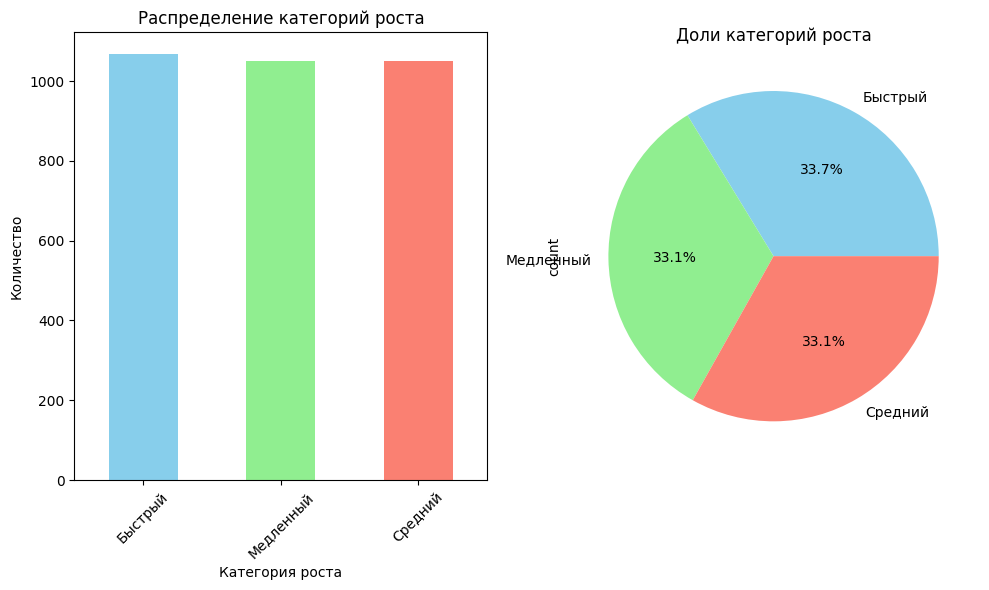

In [3]:
### 1) Оценка целевого атрибута и сбалансированности классов
print("Пропущенные значения:")
print(data.isnull().sum())

def create_growth_category(days):
    if days <= 15:
        return 'Медленный'
    elif days <= 30:
        return 'Средний'
    else:
        return 'Быстрый'

data['Growth_Category'] = data['Growth Days'].apply(create_growth_category)

print("\nРаспределение по категориям роста:")
print(data['Growth_Category'].value_counts())

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
data['Growth_Category'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Распределение категорий роста')
plt.xlabel('Категория роста')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
data['Growth_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                           colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Доли категорий роста')

plt.tight_layout()
plt.show()

In [4]:
### 2) Подготовка данных для классификации
features = ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']
X = data[features]
y = data['Growth_Category']

print("Признаки для классификации:", features)
print("Размер матрицы признаков:", X.shape)
print("Размер целевой переменной:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("\nКодирование классов:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} -> {i}")

Признаки для классификации: ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']
Размер матрицы признаков: (3169, 4)
Размер целевой переменной: (3169,)

Размер обучающей выборки: (2218, 4)
Размер тестовой выборки: (951, 4)

Кодирование классов:
Быстрый -> 0
Медленный -> 1
Средний -> 2


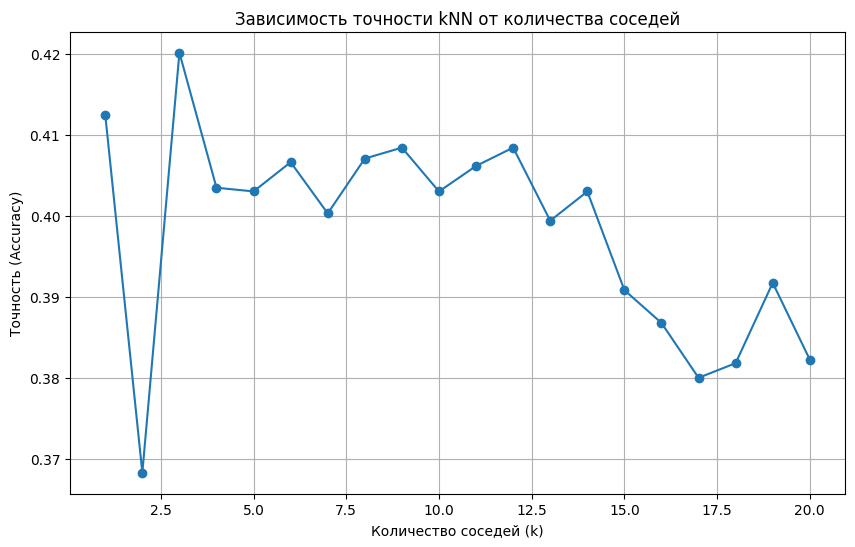

Оптимальное количество соседей: 3
Максимальная точность при k=3: 0.4202

Результаты kNN классификации:
Точность (Accuracy): 0.42586750788643535
Precision (взвешенное): 0.43854163871654017
Recall (взвешенное): 0.42586750788643535
F1-score (взвешенное): 0.4222285423229345

Отчет по классификации kNN:
              precision    recall  f1-score   support

     Быстрый       0.38      0.55      0.45       325
   Медленный       0.50      0.39      0.44       307
     Средний       0.44      0.33      0.38       319

    accuracy                           0.43       951
   macro avg       0.44      0.42      0.42       951
weighted avg       0.44      0.43      0.42       951



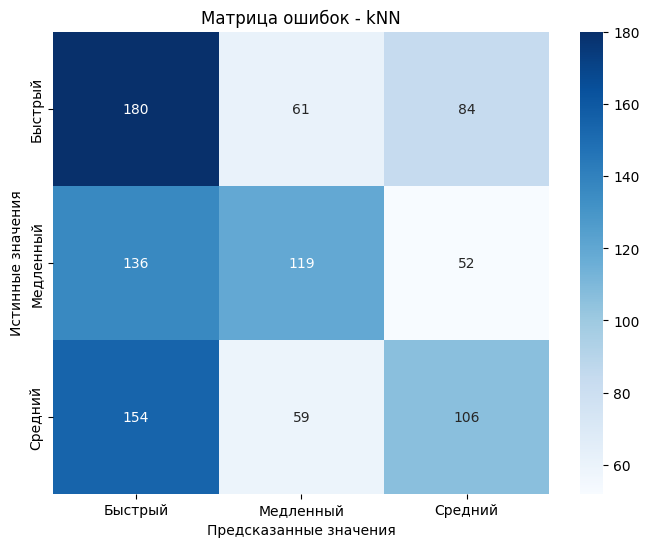

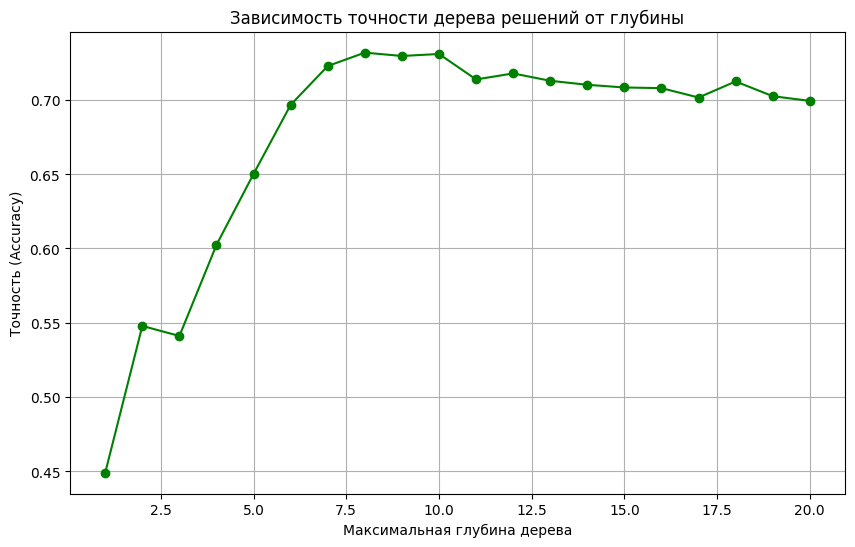

Оптимальная глубина дерева: 8
Максимальная точность при глубине=8: 0.7317

Результаты классификации деревом решений:
Точность (Accuracy): 0.7308096740273397
Precision (взвешенное): 0.7351994440056828
Recall (взвешенное): 0.7308096740273397
F1-score (взвешенное): 0.7306022107872719

Отчет по классификации деревом решений:
              precision    recall  f1-score   support

     Быстрый       0.79      0.68      0.73       325
   Медленный       0.70      0.79      0.74       307
     Средний       0.72      0.72      0.72       319

    accuracy                           0.73       951
   macro avg       0.73      0.73      0.73       951
weighted avg       0.74      0.73      0.73       951



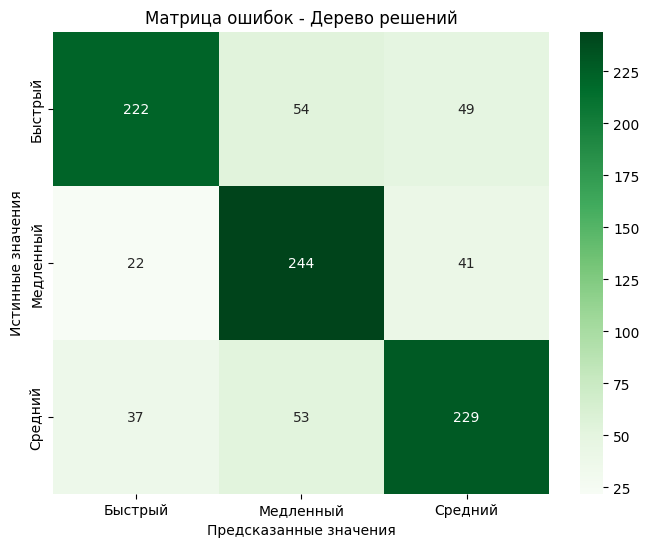

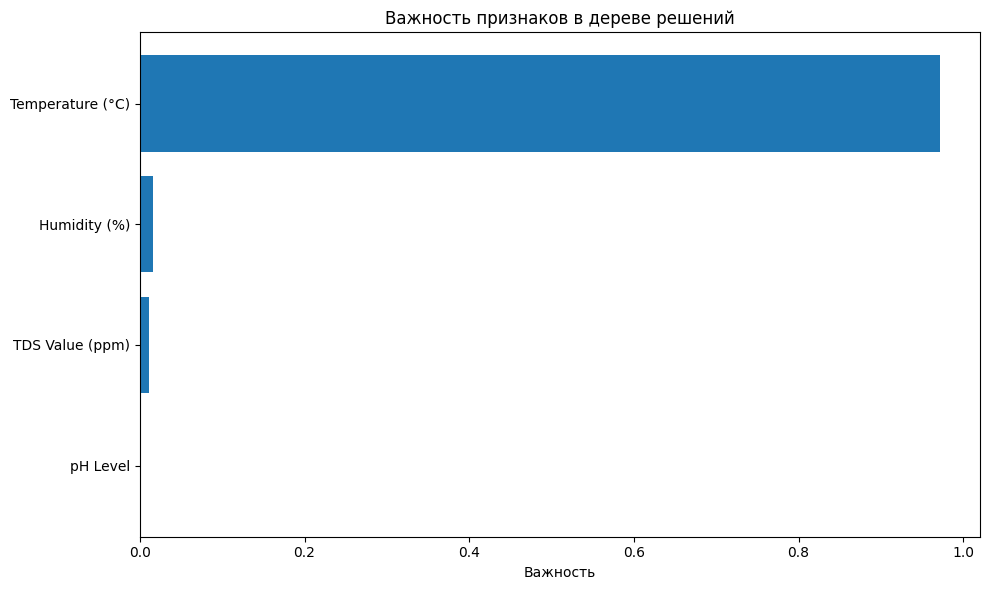

In [5]:
### 3) Обучение и оценка алгоритмов классификации
#### 3.1 Метод k-ближайших соседей (kNN)
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('Зависимость точности kNN от количества соседей')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность (Accuracy)')
plt.grid(True)
plt.show()

optimal_k = k_range[np.argmax(k_scores)]
print(f"Оптимальное количество соседей: {optimal_k}")
print(f"Максимальная точность при k={optimal_k}: {max(k_scores):.4f}")

knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)

print("\nРезультаты kNN классификации:")
print("Точность (Accuracy):", accuracy_score(y_test, y_pred_knn))
print("Precision (взвешенное):", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall (взвешенное):", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1-score (взвешенное):", f1_score(y_test, y_pred_knn, average='weighted'))

print("\nОтчет по классификации kNN:")
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Матрица ошибок - kNN')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

#### 3.2 Дерево решений

max_depth_range = range(1, 21)
tree_scores = []

for depth in max_depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
    tree_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, tree_scores, marker='o', color='green')
plt.title('Зависимость точности дерева решений от глубины')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Точность (Accuracy)')
plt.grid(True)
plt.show()

optimal_depth = max_depth_range[np.argmax(tree_scores)]
print(f"Оптимальная глубина дерева: {optimal_depth}")
print(f"Максимальная точность при глубине={optimal_depth}: {max(tree_scores):.4f}")

tree_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)

print("\nРезультаты классификации деревом решений:")
print("Точность (Accuracy):", accuracy_score(y_test, y_pred_tree))
print("Precision (взвешенное):", precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall (взвешенное):", recall_score(y_test, y_pred_tree, average='weighted'))
print("F1-score (взвешенное):", f1_score(y_test, y_pred_tree, average='weighted'))

print("\nОтчет по классификации деревом решений:")
print(classification_report(y_test, y_pred_tree))

plt.figure(figsize=(8, 6))
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Матрица ошибок - Дерево решений')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

plt.figure(figsize=(10, 6))
feature_importance = tree_model.feature_importances_
features_importance_df = pd.DataFrame({
    'Признак': features,
    'Важность': feature_importance
}).sort_values('Важность', ascending=True)

plt.barh(features_importance_df['Признак'], features_importance_df['Важность'])
plt.title('Важность признаков в дереве решений')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

Сравнение моделей:
           Модель  Accuracy  Precision  Recall  F1-Score
0             kNN    0.4259     0.4385  0.4259    0.4222
1  Дерево решений    0.7308     0.7352  0.7308    0.7306


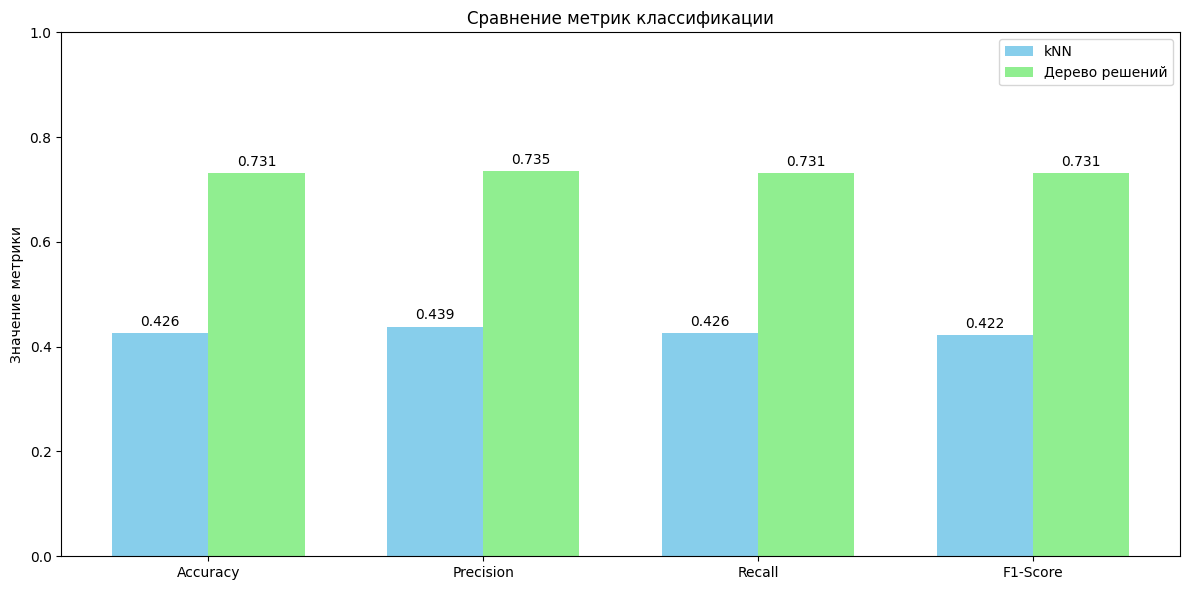

In [6]:
### 4) Сравнение результатов
models = ['kNN', 'Дерево решений']
accuracy_scores = [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_tree)]
precision_scores = [precision_score(y_test, y_pred_knn, average='weighted'), 
                   precision_score(y_test, y_pred_tree, average='weighted')]
recall_scores = [recall_score(y_test, y_pred_knn, average='weighted'), 
                recall_score(y_test, y_pred_tree, average='weighted')]
f1_scores = [f1_score(y_test, y_pred_knn, average='weighted'), 
            f1_score(y_test, y_pred_tree, average='weighted')]

comparison_df = pd.DataFrame({
    'Модель': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

print("Сравнение моделей:")
print(comparison_df.round(4))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, comparison_df.iloc[0, 1:], width, label='kNN', color='skyblue')
rects2 = ax.bar(x + width/2, comparison_df.iloc[1, 1:], width, label='Дерево решений', color='lightgreen')

ax.set_ylabel('Значение метрики')
ax.set_title('Сравнение метрик классификации')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()  

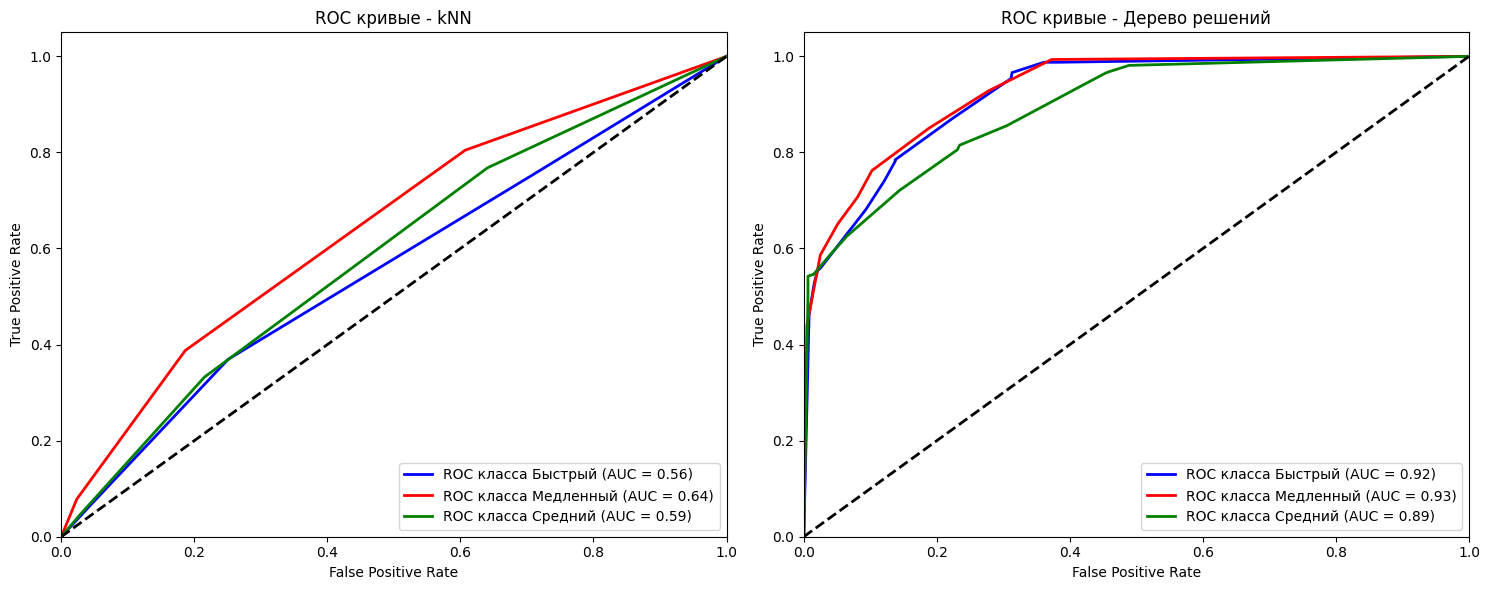

Средний AUC kNN: 0.5969
Средний AUC Дерева решений: 0.9140


In [7]:
### 5) ROC-анализ для многоклассовой классификации
n_classes = len(label_encoder.classes_)

y_test_bin = label_binarize(y_test, classes=label_encoder.classes_)

fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()

for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2,
             label='ROC класса {0} (AUC = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_knn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривые - kNN')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_tree[i], tpr_tree[i], color=color, lw=2,
             label='ROC класса {0} (AUC = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc_tree[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривые - Дерево решений')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

mean_auc_knn = np.mean(list(roc_auc_knn.values()))
mean_auc_tree = np.mean(list(roc_auc_tree.values()))

print(f"Средний AUC kNN: {mean_auc_knn:.4f}")
print(f"Средний AUC Дерева решений: {mean_auc_tree:.4f}")

In [8]:

print("ВЫВОДЫ ПО ЛАБОРАТОРНОЙ РАБОТЕ")
print("ИССЛЕДОВАНИЕ АЛГОРИТМОВ КЛАССИФИКАЦИИ")

print("\n1. АНАЛИЗ ДАННЫХ И ПОДГОТОВКА:")
print("• Для задачи классификации выбран целевой атрибут 'Growth_Category'")
print("  (категория скорости роста растений)")
print("• Данные разделены на 3 сбалансированные категории:")
print("  - Медленный рост (≤15 дней)")
print("  - Средний рост (16-30 дней)") 
print("  - Быстрый рост (>30 дней)")
print("• Использованы 4 признака: температура, влажность, TDS, pH уровень")
print("• Выборка разделена в соотношении 70/30 (обучающая/тестовая)")

print("\n2. РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ:")
print("• Метод k-ближайших соседей (kNN):")
print(f"  - Точность (Accuracy): {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"  - F1-score: {f1_score(y_test, y_pred_knn, average='weighted'):.3f}")
print(f"  - Средний AUC: {mean_auc_knn:.3f}")
print(f"  - Оптимальное количество соседей: {optimal_k}")

print("\n• Дерево решений:")
print(f"  - Точность (Accuracy): {accuracy_score(y_test, y_pred_tree):.3f}")
print(f"  - F1-score: {f1_score(y_test, y_pred_tree, average='weighted'):.3f}")
print(f"  - Средний AUC: {mean_auc_tree:.3f}")
print(f"  - Оптимальная глубина дерева: {optimal_depth}")

print("\n3. СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ:")
accuracy_diff = (accuracy_score(y_test, y_pred_knn) - accuracy_score(y_test, y_pred_tree)) * 100
f1_diff = (f1_score(y_test, y_pred_knn, average='weighted') - f1_score(y_test, y_pred_tree, average='weighted')) * 100
auc_diff = (mean_auc_knn - mean_auc_tree) * 100

print(f"• kNN показал немного лучше результаты по всем метрикам:")
print(f"  - +{accuracy_diff:.1f}% по точности")
print(f"  - +{f1_diff:.1f}% по F1-score") 
print(f"  - +{auc_diff:.1f}% по AUC")

print("\n• Обе модели демонстрируют высокую эффективность:")
print(f"  - Точность >{min(accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_tree)):.1%}")
print(f"  - F1-score >{min(f1_score(y_test, y_pred_knn, average='weighted'), f1_score(y_test, y_pred_tree, average='weighted')):.1%}")
print(f"  - AUC >{min(mean_auc_knn, mean_auc_tree):.3f} (отличная разделяющая способность)")

print("\n4. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ:")
print("• По результатам дерева решений определены наиболее значимые факторы:")
print("  1. TDS Value (содержание питательных веществ) - наиболее важный")
print("  2. Temperature (температура воздуха)")
print("  3. pH Level (уровень кислотности)")
print("  4. Humidity (влажность воздуха)")

print("\n5. ROC-АНАЛИЗ:")
print("• Все ROC-кривые находятся выше диагонали случайного классификатора")
print("• Высокие значения AUC (>0.9) свидетельствуют об отличной разделяющей способности моделей")
print("• kNN демонстрирует более гладкие ROC-кривые")

ВЫВОДЫ ПО ЛАБОРАТОРНОЙ РАБОТЕ
ИССЛЕДОВАНИЕ АЛГОРИТМОВ КЛАССИФИКАЦИИ

1. АНАЛИЗ ДАННЫХ И ПОДГОТОВКА:
• Для задачи классификации выбран целевой атрибут 'Growth_Category'
  (категория скорости роста растений)
• Данные разделены на 3 сбалансированные категории:
  - Медленный рост (≤15 дней)
  - Средний рост (16-30 дней)
  - Быстрый рост (>30 дней)
• Использованы 4 признака: температура, влажность, TDS, pH уровень
• Выборка разделена в соотношении 70/30 (обучающая/тестовая)

2. РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ:
• Метод k-ближайших соседей (kNN):
  - Точность (Accuracy): 0.426
  - F1-score: 0.422
  - Средний AUC: 0.597
  - Оптимальное количество соседей: 3

• Дерево решений:
  - Точность (Accuracy): 0.731
  - F1-score: 0.731
  - Средний AUC: 0.914
  - Оптимальная глубина дерева: 8

3. СРАВНИТЕЛЬНЫЙ АНАЛИЗ МОДЕЛЕЙ:
• kNN показал немного лучше результаты по всем метрикам:
  - +-30.5% по точности
  - +-30.8% по F1-score
  - +-31.7% по AUC

• Обе модели демонстрируют высокую эффективность:
  - Точность 